In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests

# **Team Valuations**

## Data Cleaning

In [2]:
#import file
import io
team_val = pd.read_csv('Team_Valuations.csv')
team_val.columns = team_val.iloc[2]
team_val = team_val.iloc[3:33]
team_val = team_val.rename(columns={2010.0: 2010, 2011.0: 2011, 2012.0: 2012})
team_val

2,Item,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
3,New York Knicks,586.0,655.0,780.0,"1,100","1,400","2,500","3,000","3,300","3,600","4,000",NaN
4,Golden State Warriors,315.0,363.0,450.0,555,750,"1,300","1,900","2,600","3,100","3,500",NaN
5,Los Angeles Lakers,607.0,643.0,900.0,"1,000","1,350","2,600","2,700","3,000","3,300","3,700",NaN
6,Brooklyn Nets,269.0,312.0,357.0,530,780,"1,500","1,700","1,800","2,300","2,350",NaN
7,Boston Celtics,433.0,452.0,482.0,730,875,"1,700","2,100","2,200","2,500","2,800",NaN
8,Chicago Bulls,511.0,511.0,600.0,800,"1,200","2,000","2,300","2,500","2,600","2,900",NaN
9,Houston Rockets,470.0,443.0,453.0,568,775,"1,250","1,500","1,650","2,200","2,300",NaN
10,Los Angeles Clippers,295.0,305.0,324.0,430,575,"1,600","2,000","2,000","2,150","2,200",NaN
11,Dallas Mavericks,446.0,438.0,497.0,685,765,"1,150","1,400","1,450","1,900","2,250",NaN
12,Toronto Raptors,386.0,399.0,382.0,405,520,920,980,"1,125","1,400","1,675",NaN


In [3]:
#adjust data types in earlier columns, previously were floats. turning into int
team_val.index = team_val['Item']
team_val = team_val.drop(columns='Item')

In [4]:
team_val = team_val.dropna(axis=1, how='all').apply(lambda x: x.astype(str), axis=1)
team_val = team_val.apply(lambda x: x.str.replace(',', ''), axis=1)#.apply(lambda x: x.str.replace('.', ''), axis=1)
team_val = team_val.apply(lambda x: x.astype(float), axis=1)

In [5]:
#shape(), info(), describe()
#no null values , each team is a unique row of information, each column represents a unique year
print(team_val.shape)
print(team_val.info())

(30, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, New York Knicks to New Orleans Pelicans
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    30 non-null     float64
 1   2011    30 non-null     float64
 2   2012    30 non-null     float64
 3   2013    30 non-null     float64
 4   2014    30 non-null     float64
 5   2015    30 non-null     float64
 6   2016    30 non-null     float64
 7   2017    30 non-null     float64
 8   2018    30 non-null     float64
 9   2019    30 non-null     float64
dtypes: float64(10)
memory usage: 2.6+ KB
None


In [6]:
team_val

2,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Item,,,,,,,,,,
New York Knicks,586.0,655.0,780.0,1100.0,1400.0,2500.0,3000.0,3300.0,3600.0,4000.00
Golden State Warriors,315.0,363.0,450.0,555.0,750.0,1300.0,1900.0,2600.0,3100.0,3500.00
Los Angeles Lakers,607.0,643.0,900.0,1000.0,1350.0,2600.0,2700.0,3000.0,3300.0,3700.00
Brooklyn Nets,269.0,312.0,357.0,530.0,780.0,1500.0,1700.0,1800.0,2300.0,2350.00
Boston Celtics,433.0,452.0,482.0,730.0,875.0,1700.0,2100.0,2200.0,2500.0,2800.00
Chicago Bulls,511.0,511.0,600.0,800.0,1200.0,2000.0,2300.0,2500.0,2600.0,2900.00
Houston Rockets,470.0,443.0,453.0,568.0,775.0,1250.0,1500.0,1650.0,2200.0,2300.00
Los Angeles Clippers,295.0,305.0,324.0,430.0,575.0,1600.0,2000.0,2000.0,2150.0,2200.00
Dallas Mavericks,446.0,438.0,497.0,685.0,765.0,1150.0,1400.0,1450.0,1900.0,2250.00


In [7]:
#shape(), info(), describe()
#no null values , each team is a unique row of information, each column represents a unique year
print(team_val.shape)
print(team_val.info())

(30, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, New York Knicks to New Orleans Pelicans
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    30 non-null     float64
 1   2011    30 non-null     float64
 2   2012    30 non-null     float64
 3   2013    30 non-null     float64
 4   2014    30 non-null     float64
 5   2015    30 non-null     float64
 6   2016    30 non-null     float64
 7   2017    30 non-null     float64
 8   2018    30 non-null     float64
 9   2019    30 non-null     float64
dtypes: float64(10)
memory usage: 2.6+ KB
None


In [8]:
team_val['2019'].loc['Milwaukee Bucks'] = 1350.00

## EDA

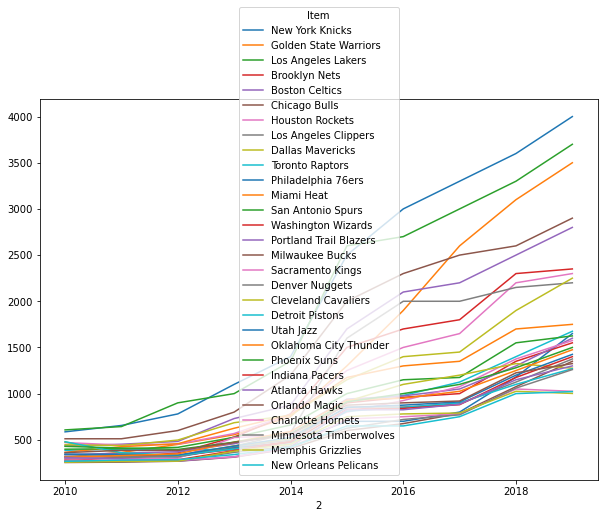

In [9]:
team_val_trans = team_val.T
team_val_trans.plot(figsize=(10, 7))

I plot the team valuations over time here you can see the exponential growth and the separation of team valuations.

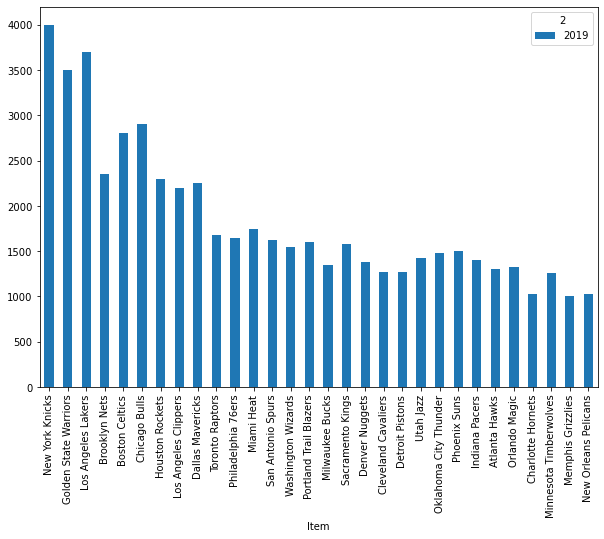

In [10]:
val_2019 = team_val[['2019']]
val_2019.plot.bar(figsize=(10, 7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8a892e070>]],
      dtype=object)

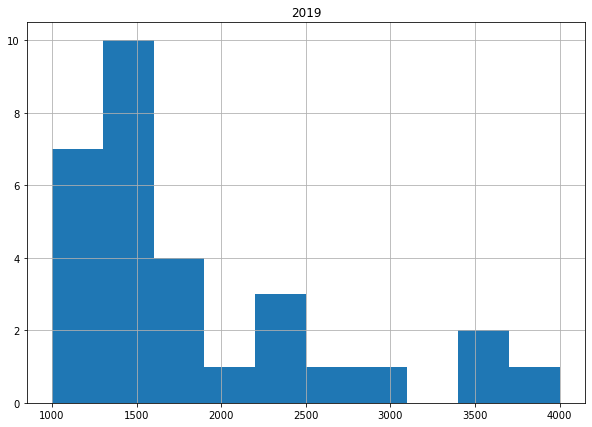

In [11]:
val_2019.hist(bins=10, figsize=(10, 7))

Here I graphed the distribution of the team valuations as of 2018. there are 3 teams skewing the values right.

# **Footwear_Basketball** 
* % of Consumer Exp. by Outlet Type
and Footwear-Basketball
* % of Consumer Unit Purchases by Brand tables
* % of Consumer Unit Purchases by Price Point
* % of Consumer Exp. by Household Income
* % of Consumer Exp. by Age Group

## Data Cleaning

In [12]:
#import file
import io
foot_b = pd.read_csv('Footwear_Basketball.csv')
#foot_b.head()

In [13]:
foot_b

,,,,,,,,,,,,,Unnamed: 12
0,Footwear-Basketball: Market Size - Total Consu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Item,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019.0,2020.0,NaN
3,Total Dollars Spent for Basketball Shoes (in m...,721.3,765.9,820.3,886.8,897.4,966.1,984.8,980.2,"1,001.1",NaN,NaN,NaN
4,Total Number of Pairs of Basketball Shoes Purc...,11.6,11.8,12.4,13.3,12.8,13.5,13.6,13.4,13.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#select the rows in each table that we're interested in. I'm pulling the Footwear-Basketball: % of Consumer Exp. by Outlet Type
#and Footwear-Basketball: % of Consumer Unit Purchases by Brand tables 
consumer_exp = foot_b.iloc[75:86]
consumer_exp.reset_index()
#consumer_exp

,index,,,,,,,,,,,,,Unnamed: 12
0,75,Sporting Goods Stores,27.6,33.6,33.8,34.9,28.9,25.3,22.4,19.3,19.2,NaN,NaN,NaN
1,76,Specialty Athletic Footwear Stores,33.0,25.5,19.3,21.4,32.9,32.9,33.7,34.2,33.1,NaN,NaN,NaN
2,77,Specialty Sport Shops,3.2,2.4,3.8,2.2,0.8,1.9,2.9,2.6,2.5,NaN,NaN,NaN
3,78,Pro Shops,0.8,1.0,0.1,0.5,0.4,1.4,1.3,1.2,2.5,NaN,NaN,NaN
4,79,Discount Stores,8.0,8.9,9.5,5.4,5.2,6.5,10.8,10.9,10.5,NaN,NaN,NaN
5,80,Department Stores,4.6,4.8,7.7,4.4,1.8,3.6,4.0,3.7,3.1,NaN,NaN,NaN
6,81,Family Footwear Stores,2.4,4.8,4.2,2.3,4.4,3.8,1.9,2.2,2.9,NaN,NaN,NaN
7,82,Brand/Mfg.,NaN,NaN,NaN,NaN,6.2,8.1,7.8,9.6,9.7,NaN,NaN,NaN
8,83,Factory Outlet Stores,7.2,4.3,5.2,9.2,3.3,2.9,2.2,2.6,2.4,NaN,NaN,NaN
9,84,Mail Order,0.5,1.1,2.1,3.0,4.5,0.4,---,---,---,NaN,NaN,NaN


In [15]:
#add column names
consumer_exp.columns = ["Location", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
consumer_exp
#theres a random column with nothing in it, but also 2019 and 2020 are null, so I'm dropping them
consumer_exp = consumer_exp.drop(["2019", "2020", "?"], axis =1)
consumer_exp.head(20)

,Location,2010,2011,2012,2013,2014,2015,2016,2017,2018
75,Sporting Goods Stores,27.6,33.6,33.8,34.9,28.9,25.3,22.4,19.3,19.2
76,Specialty Athletic Footwear Stores,33.0,25.5,19.3,21.4,32.9,32.9,33.7,34.2,33.1
77,Specialty Sport Shops,3.2,2.4,3.8,2.2,0.8,1.9,2.9,2.6,2.5
78,Pro Shops,0.8,1.0,0.1,0.5,0.4,1.4,1.3,1.2,2.5
79,Discount Stores,8.0,8.9,9.5,5.4,5.2,6.5,10.8,10.9,10.5
80,Department Stores,4.6,4.8,7.7,4.4,1.8,3.6,4.0,3.7,3.1
81,Family Footwear Stores,2.4,4.8,4.2,2.3,4.4,3.8,1.9,2.2,2.9
82,Brand/Mfg.,NaN,NaN,NaN,NaN,6.2,8.1,7.8,9.6,9.7
83,Factory Outlet Stores,7.2,4.3,5.2,9.2,3.3,2.9,2.2,2.6,2.4
84,Mail Order,0.5,1.1,2.1,3.0,4.5,0.4,---,---,---


In [16]:
import numpy as np

In [17]:
#turning --- into NaN. Not sure why this wasnt coded as null...
consumer_expf = consumer_exp.copy()
consumer_expf["2016"] = consumer_expf["2016"].replace("---", np.nan)
consumer_expf["2017"] = consumer_expf["2017"].replace("---", np.nan)
consumer_expf["2018"] = consumer_expf["2018"].replace("---", np.nan)
consumer_expf

,Location,2010,2011,2012,2013,2014,2015,2016,2017,2018
75,Sporting Goods Stores,27.6,33.6,33.8,34.9,28.9,25.3,22.4,19.3,19.2
76,Specialty Athletic Footwear Stores,33.0,25.5,19.3,21.4,32.9,32.9,33.7,34.2,33.1
77,Specialty Sport Shops,3.2,2.4,3.8,2.2,0.8,1.9,2.9,2.6,2.5
78,Pro Shops,0.8,1.0,0.1,0.5,0.4,1.4,1.3,1.2,2.5
79,Discount Stores,8.0,8.9,9.5,5.4,5.2,6.5,10.8,10.9,10.5
80,Department Stores,4.6,4.8,7.7,4.4,1.8,3.6,4.0,3.7,3.1
81,Family Footwear Stores,2.4,4.8,4.2,2.3,4.4,3.8,1.9,2.2,2.9
82,Brand/Mfg.,NaN,NaN,NaN,NaN,6.2,8.1,7.8,9.6,9.7
83,Factory Outlet Stores,7.2,4.3,5.2,9.2,3.3,2.9,2.2,2.6,2.4
84,Mail Order,0.5,1.1,2.1,3.0,4.5,0.4,NaN,NaN,NaN


In [18]:
#checking data types and converting from object to int
#consumer_exp.dtypes
consumer_expf["2010"] = consumer_expf["2010"].astype(float)
consumer_expf["2011"] = consumer_expf["2011"].astype(float)
consumer_expf["2012"] = consumer_expf["2012"].astype(float)
consumer_expf["2013"] = consumer_expf["2013"].astype(float)
consumer_expf["2014"] = consumer_expf["2014"].astype(float)
consumer_expf["2015"] = consumer_expf["2015"].astype(float)
consumer_expf["2016"] = consumer_expf["2016"].astype(float)
consumer_expf["2017"] = consumer_expf["2017"].astype(float)
consumer_expf["2018"] = consumer_expf["2018"].astype(float)
consumer_expf.dtypes

Location     object
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
dtype: object

In [19]:
#set index
consumer_expf = consumer_expf.set_index("Location")
consumer_expf.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Location,,,,,,,,,
Sporting Goods Stores,27.6,33.6,33.8,34.9,28.9,25.3,22.4,19.3,19.2
Specialty Athletic Footwear Stores,33.0,25.5,19.3,21.4,32.9,32.9,33.7,34.2,33.1
Specialty Sport Shops,3.2,2.4,3.8,2.2,0.8,1.9,2.9,2.6,2.5
Pro Shops,0.8,1.0,0.1,0.5,0.4,1.4,1.3,1.2,2.5
Discount Stores,8.0,8.9,9.5,5.4,5.2,6.5,10.8,10.9,10.5


In [20]:
#shape(), info(), describe()
print(consumer_expf.shape)
print(consumer_expf.info())
print(consumer_expf.describe())

(11, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Sporting Goods Stores to Online/Internet
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    10 non-null     float64
 1   2011    10 non-null     float64
 2   2012    10 non-null     float64
 3   2013    10 non-null     float64
 4   2014    11 non-null     float64
 5   2015    11 non-null     float64
 6   2016    10 non-null     float64
 7   2017    10 non-null     float64
 8   2018    10 non-null     float64
dtypes: float64(9)
memory usage: 880.0+ bytes
None
            2010       2011       2012       2013       2014       2015  \
count  10.000000  10.000000  10.000000  10.000000  11.000000  11.000000   
mean    9.840000   9.850000  10.000000   9.920000   9.000000   9.072727   
std    11.350986  11.091263  10.178954  11.041618  11.220517  10.655711   
min     0.500000   1.000000   0.100000   0.500000   0.400000   0.400000   
25%     2.600000   2.875000  

In [21]:
#select the rows in each table that we're interested in. I'm pulling the Footwear-Basketball: % of Consumer Exp. by Outlet Type
#and Footwear-Basketball: % of Consumer Unit Purchases by Brand tables 
brand_unit = foot_b.iloc[113:145]
brand_unit.reset_index()
brand_unit.head()

,,,,,,,,,,,,,Unnamed: 12
113,Basketball Shoes: Nike,66.5,65.9,65.4,68.7,72.0,77.6,71.8,76.3,74.5,NaN,NaN,NaN
114,Basketball Shoes: adidas,7.6,6.6,8.7,10.0,5.9,8.5,11.0,8.3,11.0,NaN,NaN,NaN
115,Basketball Shoes: Under Armour,---,0.5,0.9,0.5,3.1,2.1,3.9,4.2,3.1,NaN,NaN,NaN
116,Basketball Shoes: Reebok (adidas),3.8,4.1,3.4,2.8,1.8,2.7,2.4,1.3,2.9,NaN,NaN,NaN
117,Basketball Shoes: Puma,1.3,1.2,1.0,0.6,0.6,1.2,1.5,2.6,1.5,NaN,NaN,NaN


In [22]:
#add column names
brand_unit.columns = ["Basketball Shoes: Brand", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
#theres a random column with nothing in it, but also 2019 and 2020 are null, so I'm dropping them
brand_unit = brand_unit.drop(["2019", "2020", "?"], axis =1)
brand_unit.head(20)

,Basketball Shoes: Brand,2010,2011,2012,2013,2014,2015,2016,2017,2018
113,Basketball Shoes: Nike,66.5,65.9,65.4,68.7,72.0,77.6,71.8,76.3,74.5
114,Basketball Shoes: adidas,7.6,6.6,8.7,10.0,5.9,8.5,11.0,8.3,11.0
115,Basketball Shoes: Under Armour,---,0.5,0.9,0.5,3.1,2.1,3.9,4.2,3.1
116,Basketball Shoes: Reebok (adidas),3.8,4.1,3.4,2.8,1.8,2.7,2.4,1.3,2.9
117,Basketball Shoes: Puma,1.3,1.2,1.0,0.6,0.6,1.2,1.5,2.6,1.5
118,Basketball Shoes: New Balance,1.4,1.1,1.4,0.5,0.7,0.8,1.1,1.4,1.0
119,Basketball Shoes: Converse (Nike),4.3,3.7,2.4,2.3,2.6,1.7,1.0,1.7,0.9
120,Basketball Shoes: Fila,0.9,1.2,---,1.0,1.1,---,---,0.7,0.7
121,Basketball Shoes: And 1,0.7,0.8,1.1,0.5,1.3,1.1,0.8,---,0.7
122,Basketball Shoes: Wal-Mart,---,---,---,---,0.3,0.7,1.5,---,---


In [23]:
#update first column to just brand name, drop "Basketball Shoes: Brand" column
brand_unit["Brand"] = brand_unit["Basketball Shoes: Brand"].str.split(":").str[1]
brand_unit.columns = ["Basketball Shoes: Brand", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "Brand"]
brand_unit = brand_unit.filter(["Brand", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"])
brand_unit

,Brand,2010,2011,2012,2013,2014,2015,2016,2017,2018
113,Nike,66.5,65.9,65.4,68.7,72.0,77.6,71.8,76.3,74.5
114,adidas,7.6,6.6,8.7,10.0,5.9,8.5,11.0,8.3,11.0
115,Under Armour,---,0.5,0.9,0.5,3.1,2.1,3.9,4.2,3.1
116,Reebok (adidas),3.8,4.1,3.4,2.8,1.8,2.7,2.4,1.3,2.9
117,Puma,1.3,1.2,1.0,0.6,0.6,1.2,1.5,2.6,1.5
118,New Balance,1.4,1.1,1.4,0.5,0.7,0.8,1.1,1.4,1.0
119,Converse (Nike),4.3,3.7,2.4,2.3,2.6,1.7,1.0,1.7,0.9
120,Fila,0.9,1.2,---,1.0,1.1,---,---,0.7,0.7
121,And 1,0.7,0.8,1.1,0.5,1.3,1.1,0.8,---,0.7
122,Wal-Mart,---,---,---,---,0.3,0.7,1.5,---,---


In [24]:
#changing --- to NaN
brand_unitf = brand_unit.copy()
brand_unitf["2010"] = brand_unitf["2010"].replace("---", np.nan)
brand_unitf["2011"] = brand_unitf["2011"].replace("---", np.nan)
brand_unitf["2012"] = brand_unitf["2012"].replace("---", np.nan)
brand_unitf["2013"] = brand_unitf["2013"].replace("---", np.nan)
brand_unitf["2014"] = brand_unitf["2014"].replace("---", np.nan)
brand_unitf["2015"] = brand_unitf["2015"].replace("---", np.nan)
brand_unitf["2016"] = brand_unitf["2016"].replace("---", np.nan)
brand_unitf["2017"] = brand_unitf["2017"].replace("---", np.nan)
brand_unitf["2018"] = brand_unitf["2018"].replace("---", np.nan)
#brand_unitf.head()

In [25]:
#checking data types and converting from object to int
brand_unitf.dtypes
brand_unitf["2010"] = brand_unitf["2010"].astype(float)
brand_unitf["2011"] = brand_unitf["2011"].astype(float)
brand_unitf["2012"] = brand_unitf["2012"].astype(float)
brand_unitf["2013"] = brand_unitf["2013"].astype(float)
brand_unitf["2014"] = brand_unitf["2014"].astype(float)
brand_unitf["2015"] = brand_unitf["2015"].astype(float)
brand_unitf["2016"] = brand_unitf["2016"].astype(float)
brand_unitf["2017"] = brand_unitf["2017"].astype(float)
brand_unitf["2018"] = brand_unitf["2018"].astype(float)
brand_unitf.dtypes

Brand     object
2010     float64
2011     float64
2012     float64
2013     float64
2014     float64
2015     float64
2016     float64
2017     float64
2018     float64
dtype: object

In [26]:
#set index
brand_unitf = brand_unitf.set_index("Brand")
brand_unitf.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Brand,,,,,,,,,
Nike,66.5,65.9,65.4,68.7,72.0,77.6,71.8,76.3,74.5
adidas,7.6,6.6,8.7,10.0,5.9,8.5,11.0,8.3,11.0
Under Armour,NaN,0.5,0.9,0.5,3.1,2.1,3.9,4.2,3.1
Reebok (adidas),3.8,4.1,3.4,2.8,1.8,2.7,2.4,1.3,2.9
Puma,1.3,1.2,1.0,0.6,0.6,1.2,1.5,2.6,1.5


In [27]:
#shape(), info(), describe()
print(brand_unitf.shape)
print(brand_unitf.info())
print(brand_unitf.describe())

(32, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries,  Nike to  Voit
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    13 non-null     float64
 1   2011    12 non-null     float64
 2   2012    12 non-null     float64
 3   2013    13 non-null     float64
 4   2014    17 non-null     float64
 5   2015    10 non-null     float64
 6   2016    11 non-null     float64
 7   2017    8 non-null      float64
 8   2018    9 non-null      float64
dtypes: float64(9)
memory usage: 2.5+ KB
None
            2010       2011       2012       2013       2014       2015  \
count  13.000000  12.000000  12.000000  13.000000  17.000000  10.000000   
mean    7.523077   8.025000   8.025000   7.553846   5.823529   9.690000   
std    17.926803  18.437468  18.358754  18.669744  17.175547  23.976074   
min     0.500000   0.500000   0.500000   0.500000   0.200000   0.500000   
25%     0.800000   1.025000   0.850000   0.600000   0.400000

In [28]:
#select the rows in each table that we're interested in. I'm pulling the Footwear-Basketball: % of Consumer Unit Purchases by Price Point
shoe_pr = foot_b.iloc[151:171]
shoe_pr.reset_index()
shoe_pr

,,,,,,,,,,,,,Unnamed: 12
151,Under $50,33.6,30.7,NaN,NaN,21.6,16.7,21.1,13.4,14.5,NaN,NaN,NaN
152,$50 to $74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,22.3,NaN,NaN,NaN
153,$75 to $124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.3,38.0,NaN,NaN,NaN
154,$125 & Over,NaN,NaN,NaN,NaN,10.7,19.7,18.8,26.3,25.2,NaN,NaN,NaN
155,$50 to $69,NaN,NaN,NaN,NaN,NaN,20.6,17.9,NaN,NaN,NaN,NaN,NaN
156,$70 to $99,NaN,NaN,NaN,NaN,NaN,24.9,23.4,NaN,NaN,NaN,NaN,NaN
157,$50 to $99,50.7,51.1,NaN,NaN,42.3,45.5,41.3,NaN,NaN,NaN,NaN,NaN
158,$100 to $124,NaN,NaN,NaN,NaN,25.4,18.1,18.8,NaN,NaN,NaN,NaN,NaN
159,$100 & Over,15.6,18.1,24.6,29.1,36.1,37.8,37.6,NaN,NaN,NaN,NaN,NaN
160,Under $20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#add column names
shoe_pr.columns = ["Price Bin", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
#theres a random column with nothing in it, but also 2019 and 2020 are null, so I'm dropping them
shoe_pr = shoe_pr.drop(["2019", "2020", "?"], axis =1)
shoe_pr.head()

,Price Bin,2010,2011,2012,2013,2014,2015,2016,2017,2018
151,Under $50,33.6,30.7,NaN,NaN,21.6,16.7,21.1,13.4,14.5
152,$50 to $74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,22.3
153,$75 to $124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.3,38.0
154,$125 & Over,NaN,NaN,NaN,NaN,10.7,19.7,18.8,26.3,25.2
155,$50 to $69,NaN,NaN,NaN,NaN,NaN,20.6,17.9,NaN,NaN


In [30]:
#changing --- to NaN
shoe_prf = shoe_pr.copy()
shoe_prf["2010"] = shoe_prf["2010"].replace("---", np.nan)
shoe_prf["2011"] = shoe_prf["2011"].replace("---", np.nan)
shoe_prf["2012"] = shoe_prf["2012"].replace("---", np.nan)
shoe_prf["2013"] = shoe_prf["2013"].replace("---", np.nan)
shoe_prf["2014"] = shoe_prf["2014"].replace("---", np.nan)
shoe_prf["2015"] = shoe_prf["2015"].replace("---", np.nan)
shoe_prf["2016"] = shoe_prf["2016"].replace("---", np.nan)
shoe_prf["2017"] = shoe_prf["2017"].replace("---", np.nan)
#original code. edited to replace with np.NaN instead of just string with "NaN"
#shoe_prf["2018"] = shoe_prf["2018"].replace("---", "NaN")
shoe_prf["2018"] = shoe_prf["2018"].replace("---", np.nan)
shoe_prf.head()

,Price Bin,2010,2011,2012,2013,2014,2015,2016,2017,2018
151,Under $50,33.6,30.7,NaN,NaN,21.6,16.7,21.1,13.4,14.5
152,$50 to $74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,22.3
153,$75 to $124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.3,38.0
154,$125 & Over,NaN,NaN,NaN,NaN,10.7,19.7,18.8,26.3,25.2
155,$50 to $69,NaN,NaN,NaN,NaN,NaN,20.6,17.9,NaN,NaN


In [31]:
#checking data types and converting from object to int
shoe_prf.dtypes
shoe_prf["2010"] = shoe_prf["2010"].astype(float)
shoe_prf["2011"] = shoe_prf["2011"].astype(float)
shoe_prf["2012"] = shoe_prf["2012"].astype(float)
shoe_prf["2013"] = shoe_prf["2013"].astype(float)
shoe_prf["2014"] = shoe_prf["2014"].astype(float)
shoe_prf["2015"] = shoe_prf["2015"].astype(float)
shoe_prf["2016"] = shoe_prf["2016"].astype(float)
shoe_prf["2017"] = shoe_prf["2017"].astype(float)
shoe_prf["2018"] = shoe_prf["2018"].astype(float)
shoe_prf.dtypes

Price Bin     object
2010         float64
2011         float64
2012         float64
2013         float64
2014         float64
2015         float64
2016         float64
2017         float64
2018         float64
dtype: object

In [32]:
#shape(), info(), describe(), and is_unique()
print(shoe_prf.shape)
print(shoe_prf.info())
#a ton of nuls, not sure that this data is worth using since it loses data over time as we get closer to the present year

(20, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 151 to 170
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price Bin  20 non-null     object 
 1   2010       12 non-null     float64
 2   2011       12 non-null     float64
 3   2012       4 non-null      float64
 4   2013       4 non-null      float64
 5   2014       5 non-null      float64
 6   2015       7 non-null      float64
 7   2016       7 non-null      float64
 8   2017       4 non-null      float64
 9   2018       4 non-null      float64
dtypes: float64(9), object(1)
memory usage: 1.7+ KB
None


In [33]:
#select the rows in each table that we're interested in. I'm pulling the Footwear-Basketball: % of Consumer Exp. by Age Group
age_group = foot_b.iloc[10:17]
age_group.reset_index()
age_group#.head()

,,,,,,,,,,,,,Unnamed: 12
10,Under 14 (19.8% of U.S. Pop.),25.3,27.5,25.3,31.2,28.9,19.6,16.6,18.4,16.3,NaN,NaN,NaN
11,14-17 (5.7% of U.S. Pop.),25.5,25.9,28.7,23.0,22.7,16.3,13.7,12.9,16.2,NaN,NaN,NaN
12,18-24 (9.7% of U.S. Pop.),18.5,15.8,14.3,13.6,11.0,18.7,16.4,16.3,14.2,NaN,NaN,NaN
13,25-34 (13.5% of U.S. Pop.),13.4,14.9,11.9,10.7,17.1,21.5,25.0,23.3,19.0,NaN,NaN,NaN
14,35-44 (16.2% of U.S. Pop.),9.3,5.7,10.2,10.0,9.9,11.8,16.0,17.6,21.7,NaN,NaN,NaN
15,45-64 (22.4% of U.S. Pop.),6.6,9.6,8.3,9.9,9.8,12.1,10.6,10.1,10.9,NaN,NaN,NaN
16,65 & Over (12.7% of U.S. Pop.),1.4,0.6,1.3,1.6,0.6,---,1.7,1.4,1.7,NaN,NaN,NaN


In [34]:
#add column names
age_group.columns = ["Age Bin", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
#theres a random column with nothing in it, but also 2019 and 2020 are null, so I'm dropping them
age_group = age_group.drop(["2019", "2020", "?"], axis =1)
age_group.head()

,Age Bin,2010,2011,2012,2013,2014,2015,2016,2017,2018
10,Under 14 (19.8% of U.S. Pop.),25.3,27.5,25.3,31.2,28.9,19.6,16.6,18.4,16.3
11,14-17 (5.7% of U.S. Pop.),25.5,25.9,28.7,23.0,22.7,16.3,13.7,12.9,16.2
12,18-24 (9.7% of U.S. Pop.),18.5,15.8,14.3,13.6,11.0,18.7,16.4,16.3,14.2
13,25-34 (13.5% of U.S. Pop.),13.4,14.9,11.9,10.7,17.1,21.5,25.0,23.3,19.0
14,35-44 (16.2% of U.S. Pop.),9.3,5.7,10.2,10.0,9.9,11.8,16.0,17.6,21.7


In [35]:
#changing --- to NaN
age_groupf = age_group.copy()
age_groupf["2015"] = age_groupf["2015"].replace("---", np.nan)

In [36]:
#checking data types and converting from object to int
age_groupf.dtypes
age_groupf["2010"] = age_groupf["2010"].astype(float)
age_groupf["2011"] = age_groupf["2011"].astype(float)
age_groupf["2012"] = age_groupf["2012"].astype(float)
age_groupf["2013"] = age_groupf["2013"].astype(float)
age_groupf["2014"] = age_groupf["2014"].astype(float)
age_groupf["2015"] = age_groupf["2015"].astype(float)
age_groupf["2016"] = age_groupf["2016"].astype(float)
age_groupf["2017"] = age_groupf["2017"].astype(float)
age_groupf["2018"] = age_groupf["2018"].astype(float)
age_groupf.dtypes

Age Bin     object
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
dtype: object

In [37]:
#select the rows in each table that we're interested in. I'm pulling the Footwear-Basketball: % of Consumer Exp. by Household Income
inc_group = foot_b.iloc[61:67]
inc_group.reset_index()
inc_group#.head()

,,,,,,,,,,,,,Unnamed: 12
61,"$15,000 - $24,999 (13.2% of U.S. Pop.)",7.3,12.4,9.5,9.8,8.9,8.4,6.7,6.8,3.6,NaN,NaN,NaN
62,"$25,000 - $34,999 (13.4% of U.S. Pop.)",10.1,8.9,7.6,11.2,8.9,10.3,6.8,6.2,10.2,NaN,NaN,NaN
63,"$35,000 - $49,999 (16.0% of U.S. Pop.)",9.9,15.2,11.4,9.0,8.3,13.0,8.9,10.8,11.1,NaN,NaN,NaN
64,"$50,000 - $74,999 (19.0% of U.S. Pop.)",25.3,17.9,17.9,12.6,18.1,19.8,14.3,16.2,13.8,NaN,NaN,NaN
65,"$75,000 - $99,999 (11.8% of U.S. Pop.)",11.5,13.2,14.9,10.3,18.9,13.9,17.7,16.7,15.5,NaN,NaN,NaN
66,"$100,000 & Over (9.6% of U.S. Pop.)",29.5,22.2,30.5,38.8,28.7,27.7,36.1,36.3,37.0,NaN,NaN,NaN


In [38]:
#add column names
inc_group.columns = ["HHINC Bin", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "?"]
#theres a random column with nothing in it, but also 2019 and 2020 are null, so I'm dropping them
inc_group = inc_group.drop(["2019", "2020", "?"], axis =1)
inc_group.head()

,HHINC Bin,2010,2011,2012,2013,2014,2015,2016,2017,2018
61,"$15,000 - $24,999 (13.2% of U.S. Pop.)",7.3,12.4,9.5,9.8,8.9,8.4,6.7,6.8,3.6
62,"$25,000 - $34,999 (13.4% of U.S. Pop.)",10.1,8.9,7.6,11.2,8.9,10.3,6.8,6.2,10.2
63,"$35,000 - $49,999 (16.0% of U.S. Pop.)",9.9,15.2,11.4,9.0,8.3,13.0,8.9,10.8,11.1
64,"$50,000 - $74,999 (19.0% of U.S. Pop.)",25.3,17.9,17.9,12.6,18.1,19.8,14.3,16.2,13.8
65,"$75,000 - $99,999 (11.8% of U.S. Pop.)",11.5,13.2,14.9,10.3,18.9,13.9,17.7,16.7,15.5


In [39]:
#set index
shoe_prf = shoe_prf.set_index("Price Bin")
shoe_prf.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Price Bin,,,,,,,,,
Under $50,33.6,30.7,NaN,NaN,21.6,16.7,21.1,13.4,14.5
$50 to $74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,22.3
$75 to $124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.3,38.0
$125 & Over,NaN,NaN,NaN,NaN,10.7,19.7,18.8,26.3,25.2
$50 to $69,NaN,NaN,NaN,NaN,NaN,20.6,17.9,NaN,NaN


In [40]:
#set index
age_groupf = age_groupf.set_index("Age Bin")
age_groupf.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Age Bin,,,,,,,,,
Under 14 (19.8% of U.S. Pop.),25.3,27.5,25.3,31.2,28.9,19.6,16.6,18.4,16.3
14-17 (5.7% of U.S. Pop.),25.5,25.9,28.7,23.0,22.7,16.3,13.7,12.9,16.2
18-24 (9.7% of U.S. Pop.),18.5,15.8,14.3,13.6,11.0,18.7,16.4,16.3,14.2
25-34 (13.5% of U.S. Pop.),13.4,14.9,11.9,10.7,17.1,21.5,25.0,23.3,19.0
35-44 (16.2% of U.S. Pop.),9.3,5.7,10.2,10.0,9.9,11.8,16.0,17.6,21.7


In [41]:
#shape(), info(), describe(), and is_unique()
print(age_groupf.shape)
print(age_groupf.info())
#there is only one null, in the 2015 65+ group

(7, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Under 14 (19.8% of U.S. Pop.) to 65 & Over (12.7% of U.S. Pop.)
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    7 non-null      float64
 1   2011    7 non-null      float64
 2   2012    7 non-null      float64
 3   2013    7 non-null      float64
 4   2014    7 non-null      float64
 5   2015    6 non-null      float64
 6   2016    7 non-null      float64
 7   2017    7 non-null      float64
 8   2018    7 non-null      float64
dtypes: float64(9)
memory usage: 560.0+ bytes
None


In [42]:
#checking data types and converting from object to int
inc_group.dtypes
inc_group["2010"] = inc_group["2010"].astype(float)
inc_group["2011"] = inc_group["2011"].astype(float)
inc_group["2012"] = inc_group["2012"].astype(float)
inc_group["2013"] = inc_group["2013"].astype(float)
inc_group["2014"] = inc_group["2014"].astype(float)
inc_group["2015"] = inc_group["2015"].astype(float)
inc_group["2016"] = inc_group["2016"].astype(float)
inc_group["2017"] = inc_group["2017"].astype(float)
inc_group["2018"] = inc_group["2018"].astype(float)
inc_group.dtypes

HHINC Bin     object
2010         float64
2011         float64
2012         float64
2013         float64
2014         float64
2015         float64
2016         float64
2017         float64
2018         float64
dtype: object

In [43]:
#set index
inc_group = inc_group.set_index("HHINC Bin")
inc_group.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
HHINC Bin,,,,,,,,,
"$15,000 - $24,999 (13.2% of U.S. Pop.)",7.3,12.4,9.5,9.8,8.9,8.4,6.7,6.8,3.6
"$25,000 - $34,999 (13.4% of U.S. Pop.)",10.1,8.9,7.6,11.2,8.9,10.3,6.8,6.2,10.2
"$35,000 - $49,999 (16.0% of U.S. Pop.)",9.9,15.2,11.4,9.0,8.3,13.0,8.9,10.8,11.1
"$50,000 - $74,999 (19.0% of U.S. Pop.)",25.3,17.9,17.9,12.6,18.1,19.8,14.3,16.2,13.8
"$75,000 - $99,999 (11.8% of U.S. Pop.)",11.5,13.2,14.9,10.3,18.9,13.9,17.7,16.7,15.5


In [44]:
#shape(), info(), describe(), and is_unique()
print(inc_group.shape)
print(inc_group.info())
#there is are no nulls!

(6, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, $15,000 - $24,999 (13.2% of U.S. Pop.) to $100,000 & Over (9.6% of U.S. Pop.)
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    6 non-null      float64
 1   2011    6 non-null      float64
 2   2012    6 non-null      float64
 3   2013    6 non-null      float64
 4   2014    6 non-null      float64
 5   2015    6 non-null      float64
 6   2016    6 non-null      float64
 7   2017    6 non-null      float64
 8   2018    6 non-null      float64
dtypes: float64(9)
memory usage: 480.0+ bytes
None


## EDA

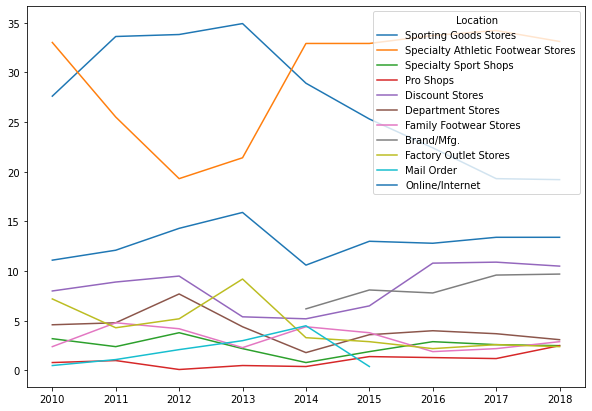

In [45]:
consumer_expf.T.plot(figsize=(10, 7))

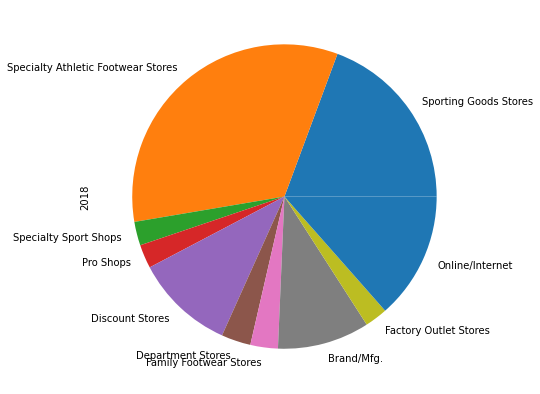

In [46]:
consumer_expf['2018'].plot.pie(figsize=(10, 7))

This plot is the percentage of total shoes bought at each location type. Notice the trend of specialty athletic footwear stores. These stores such as foot locker, finishline, etc started the 2010s in a declince then had a sharp rise in the mid 2010s starting at about 2013 this could be due to the rise in popularity of retro sneakers and them only being sold in stores. Buying shoes in person is still a very popular option because you are able to try them on. Sporting good stores such as Dick's are declining in popularity much like all retail stores and stores such as dicks do not carry the most popular shoes or exclusive shoes like Foot Locker does.

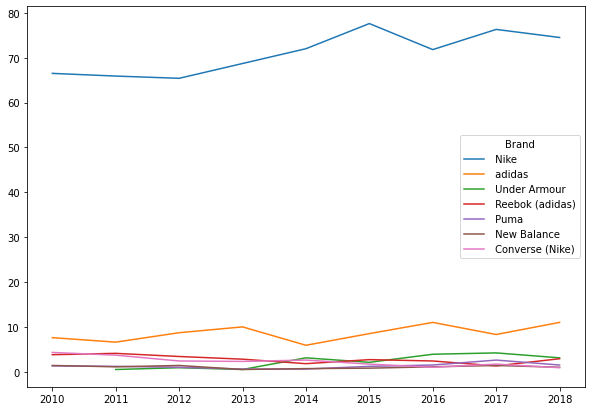

In [47]:
brand_unitf.head(7).T.plot(figsize=(10, 7))

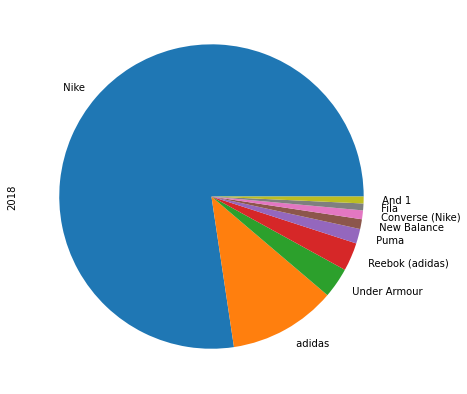

In [48]:
brand_unitf['2018'].plot.pie(figsize=(10, 7))

Here you can see the market share of shoe brands over time. Nike clearly has the majority of the market and it has been that way for the past decade. They gained this popularity in the 1980s with Micheal Jordan and his stardom made Nike the market leader. Their main competition in the 1980s was Converse, which Nike now owns.

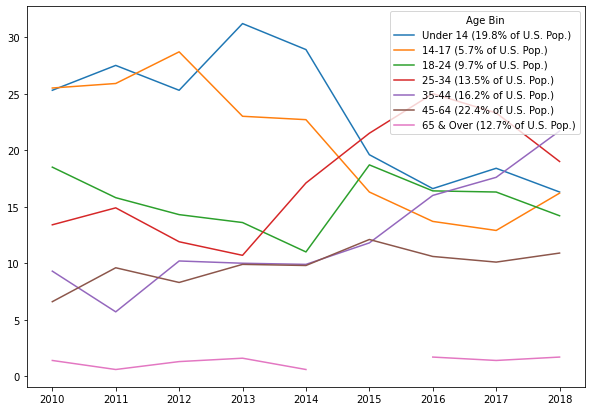

In [49]:
age_groupf.T.plot(figsize=(10, 7))

This plot shows the percentage of shoe buys based on age from 2010-2018. you can see that individuals under the age of 18 were the main consumer in the early 2010s this also changed around 2018 and the market leveled out. this does not mean that less childen are buying shoes but more people from all ages are buying shoes. The biggest change was in the 35-44 yeas old range which went from nearly last in 2011 to the leading demographic in 2018. This could also be due to the rise in popularity of retro sneakers and individuals in this demographic buying the same shoes they had or wanted in their childhood. The 65 and over crowd had no changes over the years and and still represent the lowest share of shoe buyers.

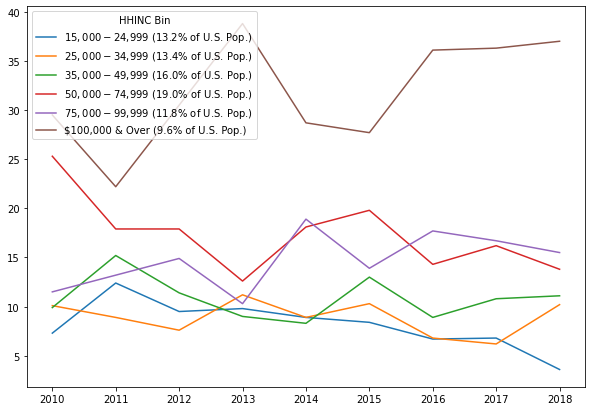

In [50]:
inc_group.T.plot(figsize=(10, 7))

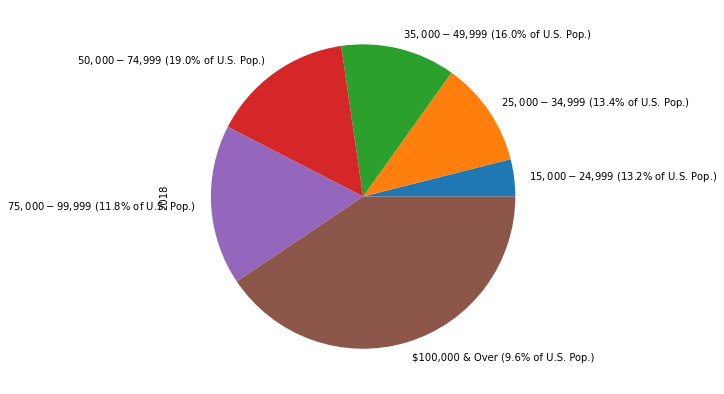

In [51]:
inc_group['2018'].plot.pie(figsize=(10, 7))

Here we can see the percentage of shoe buyers based on income over the years and in 2018. Consumers with a household income of 100,000 a year or more buy the most shoes This makes sense because they most likely have the most disposable income. They remained the leading demographic in the market even when other demographics started to fade. This could be due to the rise in price for footwear and the resellers market with high markup for limited run shoes. The 50,000-74,999 and 75,000-99,999 demographic fluctuates positions but are very similar.

# Basketball Player Salaries and Endorsements


## Data Cleaning

In [52]:
#import file
import io
player_salaries = pd.read_csv('Player_Salaries.csv')
player_salaries

,"Basketball: NBA - Purchase Price of each Franchise, year purchased ()",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Item,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
1,Atlanta Hawks (2015),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$730,000,000"
2,Boston Celtics (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$360,000,000"
3,Brooklyn Nets (2019),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$3,200,000,000"
4,Charlotte Hornets (2010),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$175,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
394,Minnesota Timberwolves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$133,229,189",NaN
395,Oklahoma City Thunder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$133,412,334",NaN
396,Miami Heat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$133,897,605",NaN
397,Portland Trail Blazers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$137,667,430",NaN


In [53]:
#select the rows in each table that we're interested in. I'm pulling the top 10 Basketball Players Salaries: 

top10_players = player_salaries.iloc[48:58]
top10_players.reset_index()
top10_players

,"Basketball: NBA - Purchase Price of each Franchise, year purchased ()",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
48,LeBron James (Los Angeles Lakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$31,400,000"
49,Stephen Curry (Golden State Warriors),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$34,000,000"
50,Kevin Durant (Brooklyn Nets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$31,200,000"
51,Russell Westbrook (Washington Wizards),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$33,000,000"
52,James Harden (Brooklyn Nets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$33,000,000"
53,Giannis Antetokounmpo (Milwaukee Bucks),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$22,000,000"
54,Klay Thompson (Golden State Warriors),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$28,300,000"
55,Kyrie Irving (Brooklyn Nets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$26,000,000"
56,Chris Paul (Phoenix Suns),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$33,100,000"
57,Damian Lillard (Portland Trail Blazers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$25,000,000"


In [54]:

# Dropping the columns having NaN/NaT values
top10_players = top10_players.dropna(axis=1)
  
top10_players

,"Basketball: NBA - Purchase Price of each Franchise, year purchased ()",Unnamed: 11
48,LeBron James (Los Angeles Lakers),"$31,400,000"
49,Stephen Curry (Golden State Warriors),"$34,000,000"
50,Kevin Durant (Brooklyn Nets),"$31,200,000"
51,Russell Westbrook (Washington Wizards),"$33,000,000"
52,James Harden (Brooklyn Nets),"$33,000,000"
53,Giannis Antetokounmpo (Milwaukee Bucks),"$22,000,000"
54,Klay Thompson (Golden State Warriors),"$28,300,000"
55,Kyrie Irving (Brooklyn Nets),"$26,000,000"
56,Chris Paul (Phoenix Suns),"$33,100,000"
57,Damian Lillard (Portland Trail Blazers),"$25,000,000"


In [55]:
top10_players.reset_index()

,index,"Basketball: NBA - Purchase Price of each Franchise, year purchased ()",Unnamed: 11
0,48,LeBron James (Los Angeles Lakers),"$31,400,000"
1,49,Stephen Curry (Golden State Warriors),"$34,000,000"
2,50,Kevin Durant (Brooklyn Nets),"$31,200,000"
3,51,Russell Westbrook (Washington Wizards),"$33,000,000"
4,52,James Harden (Brooklyn Nets),"$33,000,000"
5,53,Giannis Antetokounmpo (Milwaukee Bucks),"$22,000,000"
6,54,Klay Thompson (Golden State Warriors),"$28,300,000"
7,55,Kyrie Irving (Brooklyn Nets),"$26,000,000"
8,56,Chris Paul (Phoenix Suns),"$33,100,000"
9,57,Damian Lillard (Portland Trail Blazers),"$25,000,000"


In [56]:
#add column names
top10_players.columns= ["players", "salaries in 2021" ]
top10_players

,players,salaries in 2021
48,LeBron James (Los Angeles Lakers),"$31,400,000"
49,Stephen Curry (Golden State Warriors),"$34,000,000"
50,Kevin Durant (Brooklyn Nets),"$31,200,000"
51,Russell Westbrook (Washington Wizards),"$33,000,000"
52,James Harden (Brooklyn Nets),"$33,000,000"
53,Giannis Antetokounmpo (Milwaukee Bucks),"$22,000,000"
54,Klay Thompson (Golden State Warriors),"$28,300,000"
55,Kyrie Irving (Brooklyn Nets),"$26,000,000"
56,Chris Paul (Phoenix Suns),"$33,100,000"
57,Damian Lillard (Portland Trail Blazers),"$25,000,000"


In [57]:
#set index
top10_players= top10_players.set_index("players")
top10_players.head()

,salaries in 2021
players,
LeBron James (Los Angeles Lakers),"$31,400,000"
Stephen Curry (Golden State Warriors),"$34,000,000"
Kevin Durant (Brooklyn Nets),"$31,200,000"
Russell Westbrook (Washington Wizards),"$33,000,000"
James Harden (Brooklyn Nets),"$33,000,000"


##Basketball Players Total Earnings with Endorsements##


In [58]:
#select the rows in each table that we're interested in. I'm pulling the top 10 Basketball Players Salaries plus endorsements: 

players_earnings = player_salaries.iloc[37:47]
players_earnings.reset_index()
players_earnings

,"Basketball: NBA - Purchase Price of each Franchise, year purchased ()",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
37,LeBron James (Los Angeles Lakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$95,400,000"
38,Stephen Curry (Golden State Warriors),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$74,400,000"
39,Kevin Durant (Brooklyn Nets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$65,200,000"
40,Russell Westbrook (Washington Wizards),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$58,000,000"
41,James Harden (Brooklyn Nets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$50,000,000"
42,Giannis Antetokounmpo (Milwaukee Bucks),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$49,000,000"
43,Klay Thompson (Golden State Warriors),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$43,300,000"
44,Kyrie Irving (Brooklyn Nets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$43,000,000"
45,Chris Paul (Phoenix Suns),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$40,100,000"
46,Damian Lillard (Portland Trailblazers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$39,000,000"


In [59]:
# Dropping the columns having NaN/NaT values
players_earnings = players_earnings.dropna(axis=1)
  
players_earnings

,"Basketball: NBA - Purchase Price of each Franchise, year purchased ()",Unnamed: 11
37,LeBron James (Los Angeles Lakers),"$95,400,000"
38,Stephen Curry (Golden State Warriors),"$74,400,000"
39,Kevin Durant (Brooklyn Nets),"$65,200,000"
40,Russell Westbrook (Washington Wizards),"$58,000,000"
41,James Harden (Brooklyn Nets),"$50,000,000"
42,Giannis Antetokounmpo (Milwaukee Bucks),"$49,000,000"
43,Klay Thompson (Golden State Warriors),"$43,300,000"
44,Kyrie Irving (Brooklyn Nets),"$43,000,000"
45,Chris Paul (Phoenix Suns),"$40,100,000"
46,Damian Lillard (Portland Trailblazers),"$39,000,000"


In [60]:
#add column names
players_earnings.columns= ["players", "Total Earnings in 2021" ]
players_earnings

,players,Total Earnings in 2021
37,LeBron James (Los Angeles Lakers),"$95,400,000"
38,Stephen Curry (Golden State Warriors),"$74,400,000"
39,Kevin Durant (Brooklyn Nets),"$65,200,000"
40,Russell Westbrook (Washington Wizards),"$58,000,000"
41,James Harden (Brooklyn Nets),"$50,000,000"
42,Giannis Antetokounmpo (Milwaukee Bucks),"$49,000,000"
43,Klay Thompson (Golden State Warriors),"$43,300,000"
44,Kyrie Irving (Brooklyn Nets),"$43,000,000"
45,Chris Paul (Phoenix Suns),"$40,100,000"
46,Damian Lillard (Portland Trailblazers),"$39,000,000"


In [61]:
#set index
players_earnings= players_earnings.set_index("players")
top10_players.head()

,salaries in 2021
players,
LeBron James (Los Angeles Lakers),"$31,400,000"
Stephen Curry (Golden State Warriors),"$34,000,000"
Kevin Durant (Brooklyn Nets),"$31,200,000"
Russell Westbrook (Washington Wizards),"$33,000,000"
James Harden (Brooklyn Nets),"$33,000,000"


In [62]:
#showing data type
players_earnings.dtypes

Total Earnings in 2021    object
dtype: object

##Basketball Players Endorsements##


In [63]:
#select the rows in each table that we're interested in. I'm pulling the top 10 Basketball Players endorsements: 

players_endorsements = player_salaries.iloc[59:69]
players_endorsements.reset_index()
players_endorsements

,"Basketball: NBA - Purchase Price of each Franchise, year purchased ()",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
59,Lebron James (Los Angeles Lakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$64,000,000"
60,Stephen Curry (Golden State Warriors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$40,000,000"
61,Kevin Durant (Brooklyn Nets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$34,000,000"
62,Russell Westbrook (Washington Wizards),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$25,000,000"
63,James Harden (Brooklyn Nets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$17,000,000"
64,Giannis Antetokounmpo (Milwaukee Bucks),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$27,000,000"
65,Klay Thompson (Golden State Warriors),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$15,000,000"
66,Kyrie Irving (Brooklyn Nets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$17,000,000"
67,Chris Paul (Phoenix Suns),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$7,000,000"
68,Damian Lillard (Portland Trail Blazers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$14,000,000"


In [64]:
# Dropping the columns having NaN/NaT values
players_endorsements = players_endorsements.dropna(axis=1)
  
players_endorsements

,"Basketball: NBA - Purchase Price of each Franchise, year purchased ()",Unnamed: 11
59,Lebron James (Los Angeles Lakers),"$64,000,000"
60,Stephen Curry (Golden State Warriors,"$40,000,000"
61,Kevin Durant (Brooklyn Nets),"$34,000,000"
62,Russell Westbrook (Washington Wizards),"$25,000,000"
63,James Harden (Brooklyn Nets),"$17,000,000"
64,Giannis Antetokounmpo (Milwaukee Bucks),"$27,000,000"
65,Klay Thompson (Golden State Warriors),"$15,000,000"
66,Kyrie Irving (Brooklyn Nets),"$17,000,000"
67,Chris Paul (Phoenix Suns),"$7,000,000"
68,Damian Lillard (Portland Trail Blazers),"$14,000,000"


In [65]:
#add column names
players_endorsements.columns= ["Players", "Endorsements Earnings in 2021" ]
players_endorsements

,Players,Endorsements Earnings in 2021
59,Lebron James (Los Angeles Lakers),"$64,000,000"
60,Stephen Curry (Golden State Warriors,"$40,000,000"
61,Kevin Durant (Brooklyn Nets),"$34,000,000"
62,Russell Westbrook (Washington Wizards),"$25,000,000"
63,James Harden (Brooklyn Nets),"$17,000,000"
64,Giannis Antetokounmpo (Milwaukee Bucks),"$27,000,000"
65,Klay Thompson (Golden State Warriors),"$15,000,000"
66,Kyrie Irving (Brooklyn Nets),"$17,000,000"
67,Chris Paul (Phoenix Suns),"$7,000,000"
68,Damian Lillard (Portland Trail Blazers),"$14,000,000"


In [66]:
#set index
players_endorsements= players_endorsements.set_index("Players")
players_endorsements.head()

,Endorsements Earnings in 2021
Players,
Lebron James (Los Angeles Lakers),"$64,000,000"
Stephen Curry (Golden State Warriors,"$40,000,000"
Kevin Durant (Brooklyn Nets),"$34,000,000"
Russell Westbrook (Washington Wizards),"$25,000,000"
James Harden (Brooklyn Nets),"$17,000,000"


In [67]:
#showing data type
players_endorsements.dtypes

Endorsements Earnings in 2021    object
dtype: object

In [68]:
players_endorsements.shape

(10, 1)

## EDA

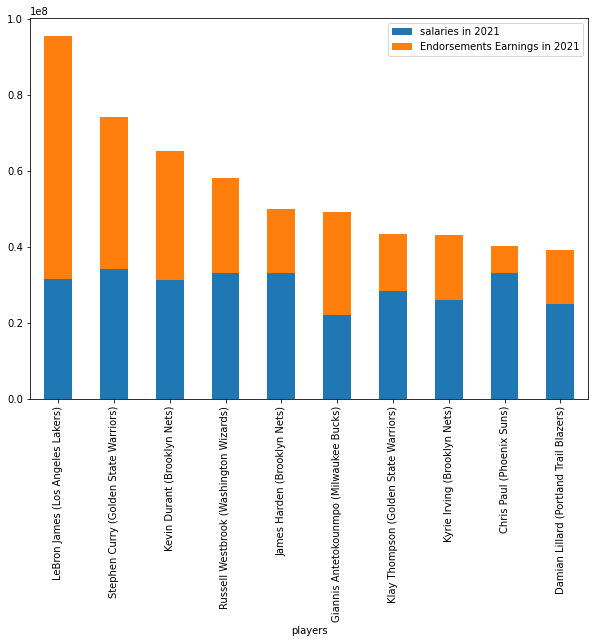

In [69]:
players_salaries_endorsements = top10_players
players_salaries_endorsements['Endorsements Earnings in 2021'] = players_endorsements['Endorsements Earnings in 2021']
players_salaries_endorsements['Endorsements Earnings in 2021'].iloc[0] = '$64,000,000'
players_salaries_endorsements['Endorsements Earnings in 2021'].iloc[1] = '$40,000,000'
players_salaries_endorsements = players_salaries_endorsements.apply(lambda x: x.str.replace(',', ''), axis=1).apply(lambda x: x.str.replace('$', ''), axis=1).apply(lambda x: x.astype(float), axis=1)
players_salaries_endorsements.plot.bar(figsize=(10, 7), stacked=True)


In [70]:
players_salaries_endorsements.corr()

,salaries in 2021,Endorsements Earnings in 2021
salaries in 2021,1.000000,0.220415
Endorsements Earnings in 2021,0.220415,1.000000


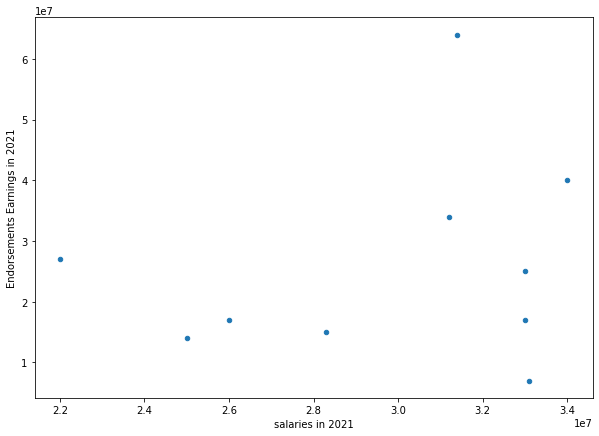

In [71]:
players_salaries_endorsements.plot.scatter(x='salaries in 2021', y='Endorsements Earnings in 2021', figsize=(10, 7))

We can see here that there does not seem to be a strong correlation between salary and endorsements. I would like to get disaggregated data to truly analyze this because this is just data on the top ten earning players.

# Fan_Market_Summary

In [72]:
# create dataframe with imported file
import io
fan_market_summary = pd.read_csv('Fan_Market_Summary.csv')
fan_market_summary

,,,,,,,,,,,,,Unnamed: 12
0,Basketball: NBA Fan Market Summary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Item,2010.0,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,NaN
3,--------------------TOTAL NBA FANS/AVIDITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total Number of NBA Fans Age 13+ (View and/or ...,NaN,"77,794","85,556","74,187","76,026","83,990","81,141","74,955","74,548","70,032","68,088",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#print info to see null value counts
fan_market_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0                 244 non-null    object 
 1                 3 non-null      float64
 2                 57 non-null     object 
 3                 164 non-null    object 
 4                 166 non-null    object 
 5                 168 non-null    object 
 6                 169 non-null    object 
 7                 166 non-null    object 
 8                 179 non-null    object 
 9                 186 non-null    object 
 10                194 non-null    object 
 11                188 non-null    object 
 12  Unnamed: 12   0 non-null      float64
dtypes: float64(2), object(11)
memory usage: 27.6+ KB


In [74]:
#rename columns to organize data
fan_market_summary.columns = ['label', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'm']
fan_market_summary


,label,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,m
0,Basketball: NBA Fan Market Summary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Item,2010.0,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,NaN
3,--------------------TOTAL NBA FANS/AVIDITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total Number of NBA Fans Age 13+ (View and/or ...,NaN,"77,794","85,556","74,187","76,026","83,990","81,141","74,955","74,548","70,032","68,088",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#drop rows that contain all null values and m column
fan_market_summary = fan_market_summary.dropna(how='all')
fan_market_summary = fan_market_summary.drop(columns='m')
fan_market_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 248
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   244 non-null    object 
 1   2010    3 non-null      float64
 2   2011    57 non-null     object 
 3   2012    164 non-null    object 
 4   2013    166 non-null    object 
 5   2014    168 non-null    object 
 6   2015    169 non-null    object 
 7   2016    166 non-null    object 
 8   2017    179 non-null    object 
 9   2018    186 non-null    object 
 10  2019    194 non-null    object 
 11  2020    188 non-null    object 
dtypes: float64(1), object(11)
memory usage: 24.8+ KB


In [76]:
#drop 2010 column because it contains no data
fan_market_summary['2010'].value_counts()
fan_market_summary = fan_market_summary.drop(columns='2010')

In [77]:
#create total_fans sub-table
total_fans = fan_market_summary.iloc[3:18]
total_fans

,label,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
4,Total Number of NBA Fans Age 13+ (View and/or ...,"77,794","85,556","74,187","76,026","83,990","81,141","74,955","74,548","70,032","68,088"
5,Total Number Attending Games (add 000),"13,758","11,386","12,662","13,229","13,354","12,211","11,315","13,943","13,889",---
6,% of Attendees who Attended More Than 1/yr.,50.7%,46.3%,42.4%,51.5%,56.1%,59.2%,52.1%,62.9%,51.0%,---
7,% of Attendees who Attended 4+ Times/yr.,24.9%,12.5%,15.5%,17.7%,22.2%,19.3%,15.7%,26.4%,19.8%,---
8,Total Viewed at Least One Game on TV and/or On...,"73,938","82,046","69,719","71,566","80,214","77,559","71,355","69,612","66,220","68,088"
9,Total Number Viewing on TV (add 000),"73,003","80,967","68,451","70,029","77,946","75,989","69,088","67,548","63,545","64,467"
10,% of TV Viewers who Viewed More Than 2/yr.,87.5%,79.8%,80.1%,74.6%,80.0%,75.4%,74.1%,75.2%,73.3%,73.6%
11,% of TV Viewers who Viewed 16+ Times/yr.,24.3%,22.4%,23.7%,23.5%,23.7%,20.4%,21.5%,22.5%,23.8%,25.0%
12,Number of TV Viewers Viewed at Least One Game ...,NaN,NaN,NaN,NaN,NaN,NaN,"65,360","62,446","57,252","56,811"
13,Number of TV Viewers Who Streamed at Least One...,NaN,NaN,NaN,NaN,NaN,NaN,"10,033","10,850","10,531","19,593"


In [78]:
#create function to clean sub-tables
def clean_set(data):
    data = data.dropna(subset=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], how='all')
    data = data.replace('---', np.nan)
    data = data.apply(lambda x: x.str.replace(',', ''), axis=1)
    data = data.apply(lambda x: x.str.replace('%', ''), axis=1)
    data = data.apply(lambda x: x.str.replace('$', ''), axis=1)
    data.index = data['label']
    data = data.drop(columns='label')
    data = data.apply(lambda x: x.astype(float), axis=1)
    return data

In [79]:
#clean total_fans
total_fans = clean_set(total_fans)
total_fans

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Total Number of NBA Fans Age 13+ (View and/or Attend - add 000),77794.0,85556.0,74187.0,76026.0,83990.0,81141.0,74955.0,74548.0,70032.0,68088.0
Total Number Attending Games (add 000),13758.0,11386.0,12662.0,13229.0,13354.0,12211.0,11315.0,13943.0,13889.0,NaN
of Attendees who Attended More Than 1/yr.,50.7,46.3,42.4,51.5,56.1,59.2,52.1,62.9,51.0,NaN
of Attendees who Attended 4+ Times/yr.,24.9,12.5,15.5,17.7,22.2,19.3,15.7,26.4,19.8,NaN
Total Viewed at Least One Game on TV and/or Online (add 000),73938.0,82046.0,69719.0,71566.0,80214.0,77559.0,71355.0,69612.0,66220.0,68088.0
Total Number Viewing on TV (add 000),73003.0,80967.0,68451.0,70029.0,77946.0,75989.0,69088.0,67548.0,63545.0,64467.0
of TV Viewers who Viewed More Than 2/yr.,87.5,79.8,80.1,74.6,80.0,75.4,74.1,75.2,73.3,73.6
of TV Viewers who Viewed 16+ Times/yr.,24.3,22.4,23.7,23.5,23.7,20.4,21.5,22.5,23.8,25.0
Number of TV Viewers Viewed at Least One Game Traditionally (Directly from TV) (add 000),NaN,NaN,NaN,NaN,NaN,NaN,65360.0,62446.0,57252.0,56811.0


In [80]:
#create and clean fan_demograpics the sub-table
fan_demographics = fan_market_summary.iloc[19:48]
fan_demographics = clean_set(fan_demographics)
fan_demographics

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
13-17,9.8,9.0,7.8,7.1,5.8,5.0,5.9,5.8,4.0,5.4
18-34,31.4,26.3,30.6,32.2,30.7,27.2,24.8,22.8,26.9,29.8
35-49,26.0,22.4,21.8,21.7,26.5,25.3,26.4,28.8,26.3,26.8
50-64,25.2,24.9,22.3,25.6,22.7,25.3,25.6,25.1,24.9,23.7
65+,7.6,17.5,17.6,13.4,14.3,17.3,17.3,17.5,17.9,14.3
Total,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Generation Z (13-22),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4,12.3
Millennials (23-38),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.4,32.3
Generation X (39-54),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.5,26.4


In [81]:
medain_age_by_segment = fan_market_summary.iloc[49:66]
medain_age_by_segment = clean_set(medain_age_by_segment)
medain_age_by_segment

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
All Fans,NaN,44.0,42.0,42.0,41.0,45.0,45.0,46.0,45.0,42.0
Attended at Least One NBA Game,NaN,35.0,33.0,31.0,35.0,38.0,40.0,38.0,37.0,NaN
Attended 4+ NBA Games,NaN,35.0,36.0,34.0,35.0,39.0,42.0,38.0,36.0,NaN
Viewed at Least One NBA Game On TV,NaN,45.0,43.0,44.0,42.0,46.0,47.0,47.0,46.0,43.0
Viewed 16+ NBA Games on TV,NaN,45.0,43.0,44.0,47.0,48.0,46.0,52.0,50.0,42.0
TV Viewers Who Viewed at Least One Game Traditionally (Directly from TV),NaN,NaN,NaN,NaN,NaN,NaN,47.0,48.0,48.0,45.0
TV Viewers Who Streamed at Least One Game to TV,NaN,NaN,NaN,NaN,NaN,NaN,32.0,37.0,33.0,34.0
Viewed at Least One Game Online (Computer/Tablet/Smartphone),NaN,29.0,29.0,28.0,31.0,33.0,32.0,33.0,30.0,33.0
Followed NBA on Facebook,NaN,30.0,31.0,31.0,35.0,34.0,36.0,38.0,36.0,38.0


In [82]:
median_income = fan_market_summary.iloc[67:84]
median_income = clean_set(median_income)
median_income

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
All Fans,NaN,57800.0,60200.0,66800.0,66000.0,67600.0,75000.0,77700.0,80600.0,78200.0
Attended at Least One NBA Game,NaN,58200.0,69900.0,70400.0,81100.0,73100.0,93000.0,96800.0,102900.0,NaN
Attended 4+ NBA Games,NaN,46500.0,69600.0,79700.0,106800.0,94200.0,87600.0,107400.0,113900.0,NaN
Viewed at Least One NBA Game on TV,NaN,58400.0,59300.0,66800.0,66000.0,67700.0,75400.0,76700.0,82600.0,77800.0
Viewed 16+ NBA Games on TV,NaN,58400.0,61600.0,71000.0,67200.0,70800.0,74500.0,87700.0,82500.0,84.0
TV Viewers Who Viewed at Least One Game Traditionally (Directly from TV),NaN,NaN,NaN,NaN,NaN,NaN,76600.0,78900.0,84200.0,76400.0
TV Viewers Who Streamed at Least One Game to TV,NaN,NaN,NaN,NaN,NaN,NaN,60800.0,65900.0,68700.0,8300.0
Viewed at Least One Game Online (Computer/Tablet/Smartphone),NaN,45000.0,55900.0,54100.0,64000.0,65900.0,61200.0,72800.0,62100.0,85200.0
Followed NBA on Facebook,NaN,42600.0,48700.0,61100.0,61600.0,55800.0,61200.0,69100.0,73600.0,78700.0


In [83]:
online_usg_by_device = fan_market_summary.iloc[85:100]
online_usg_by_device = clean_set(online_usg_by_device)
online_usg_by_device

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Total Number Using Online Device For Any Sports-related Purpose (add 000),NaN,68832.0,60437.0,65022.0,74967.0,68502.0,64330.0,63507.0,57745.0,60113.0
Total Number Viewing at least one game on Online Device (add 000),6255.0,7224.0,8656.0,9046.0,16054.0,10927.0,10849.0,10328.0,8685.0,2047900.0
Total Number Using Computer for any Sports-related Purpose (add 000),NaN,66366.0,57121.0,61237.0,68067.0,59553.0,54054.0,52318.0,46213.0,53416.0
Total Number Viewing at Least One Game on Computer (add 000),5306.0,5729.0,6989.0,7278.0,11837.0,8067.0,6859.0,6106.0,4745.0,13732.0
Total Number Using Tablet for any Sports-related Purpose (add 000),NaN,19839.0,25115.0,32225.0,41334.0,35428.0,34390.0,31874.0,24653.0,333593.0
Total Number Viewing at Least One Game on Tablet (add 000),1478.0,1568.0,3510.0,4043.0,6755.0,5027.0,4383.0,4817.0,2979.0,8234.0
Total Number using Smartphone for any Sports-related Purpose (add 000),NaN,39662.0,40991.0,47351.0,56301.0,54800.0,52469.0,52762.0,48877.0,52031.0
Total Number Viewing at Least One Game on Smartphone (add 000),1950.0,1914.0,3019.0,3542.0,5886.0,5984.0,6310.0,7033.0,4278.0,13074.0
Total Number using Mobile Device for any Sports-related Purpose (add 000),NaN,43658.0,46088.0,51913.0,61104.0,58912.0,55838.0,55516.0,51483.0,54103.0


In [84]:
social_media = fan_market_summary.iloc[101:109]
social_media = clean_set(social_media)
social_media

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Follow NBA on Facebook - Total all Followers (add 000),17052.0,20495.0,20039.0,20923.0,35746.0,26513.0,28565.0,27036.0,22889.0,34330.0
Follow Facebook Daily (add 000),3015.0,3897.0,4101.0,5146.0,5828.0,4913.0,3917.0,4888.0,2300.0,6455.0
Follow Facebook 4-6 days a week (add 000),2353.0,2282.0,2199.0,2308.0,4547.0,3493.0,3718.0,3088.0,3597.0,5697.0
Follow Facebook 1 to 3 days a week (add 000),11683.0,14316.0,13739.0,13468.0,25370.0,18106.0,20931.0,19061.0,16993.0,9050.0
Follow NBA on Twitter - Total all Followers (add 000),7933.0,10647.0,10278.0,12713.0,21521.0,13959.0,16243.0,15880.0,14325.0,23828.0
Follow Twitter Daily (add 000),2820.0,3628.0,3218.0,3401.0,3674.0,3131.0,2707.0,3446.0,2729.0,4998.0
Follow Twitter 4-6 days a week (add 000),543.0,1289.0,1307.0,2101.0,3772.0,2078.0,2374.0,2875.0,2149.0,4918.0
Follow Twitter 1 to 3 days a week or less (add 000),4570.0,5730.0,5752.0,7212.0,14076.0,8750.0,11163.0,9559.0,9447.0,5611.0


In [85]:
apparel_purchase = fan_market_summary.iloc[110:117]
apparel_purchase = clean_set(apparel_purchase)
apparel_purchase

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
of All Fans Purchased Sports Logo Apparel,19.1,16.5,18.1,19.1,23.9,20.3,21.1,26.9,19.2,27.4
of fans who used a computer to view at least one game who purchased Sports Logo Apparel,50.5,40.3,46.2,44.9,45.7,58.0,47.9,65.3,39.1,51.7
of fans who used a Tablet to view at least one game who purchased Sports Logo Apparel,65.6,57.6,49.6,54.3,53.3,60.0,55.3,68.8,58.4,60.6
of fans who used a Smartphone to view at least one game who purchased Sports Logo Apparel,55.7,43.6,42.5,65.0,51.8,64.1,55.4,68.8,52.9,53.9
of Facebook Followers Purchased Sports Logo Apparel,41.7,30.9,35.3,40.9,42.4,39.9,36.7,46.8,35.5,41.4
of Twitter Followers Purchased Sports Logo Apparel,42.9,34.3,34.6,41.1,44.7,41.9,39.0,50.6,35.5,41.2
Expenditures for Sports Logo Apparel (add 000),1038904.0,960616.0,902121.0,1126583.0,1272370.0,1125701.0,1148535.0,1480613.0,1189284.0,1392110.0


In [86]:
bball_part = fan_market_summary.iloc[118:124]
bball_part = clean_set(bball_part)
bball_part

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
of all fans who participated in Basketball at any level in the past year,20.7,17.6,21.6,20.4,20.5,NaN,NaN,NaN,NaN,NaN
of Computer game viewers who participated in Basketball at any level in the past year,42.6,36.3,48.0,48.1,35.4,NaN,NaN,NaN,NaN,NaN
of Tablet game viewers who participated in Basketball at any level in the past year,53.4,31.8,43.4,46.0,34.4,NaN,NaN,NaN,NaN,NaN
of Smartphone game viewers who participated in Basketball at any level in the past year,50.5,42.0,46.6,58.0,41.2,NaN,NaN,NaN,NaN,NaN
of Facebook followers who participated in Basketball at any level in the past year,35.3,32.4,35.7,32.3,29.8,NaN,NaN,NaN,NaN,NaN
of Twitter followers who participated in Basketball at any level in the past year,39.2,42.1,38.8,34.9,33.5,NaN,NaN,NaN,NaN,NaN


In [87]:
sports_usg = fan_market_summary.iloc[130:160]
#sports_usg = clean_set(sports_usg)
sports_usg.head()


,label,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
133,Total Used Social Media (Net),NaN,NaN,NaN,"45,858,000/60.3%","56,614,000/67.4%","47,796,000/58.9%","46,300,000/61.8%","44,844,000/60.2%","38,119,000/54.4%","46,417,000/68.2%"
134,----Watch Sports-related Video on YouTube,NaN,"36,048,000/42.1%","33,582,000/45.3%","34,327,000/45.2%","40,878,000/48.7%","32,734,000/40.3%","33,573,000/44.8%","30,479,000/40.9%","24,721,000/35.3%","30,022,000/44.1%"
135,----Used Facebook to like/follow/post about a ...,NaN,"29,501,000/34.5%","27,166,000/36.6%","26,960,000/35.5%","37,529,000/44.7%","31,594,000/38.9%","27,152,000/36.2%","25,537,000/24.3%","20,298,000/29.0%","26,726,000/39.3%"
136,----Used Google+ to like/follow/post about a s...,NaN,"20,206,000/23.6%","15,309,000/20.6%","16,240,000/21.4%","19,030,000/22.7%","15,626,000/19.3%","17,340,000/23.1%","19,720,000/26.5.%",---,---
137,----Used Instagram to like/follow/post about a...,NaN,NaN,"13,999,000/18.9%","16,676,000/21.9%","20,811,000/24.8%","20,016,000/24.7%","13,837,000/18.5%","16,809,000/22.5%","14,191,000/20.3%","21,138,000/31.0%"


In [88]:
influence_index = fan_market_summary.iloc[163:170]
influence_index = clean_set(influence_index)
influence_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Saying Sport Sponsorship is Extremely Influential,NaN,5.9,5.4,7.3,10.7,7.9,7.6,9.0,6.4,14.0
Saying Sport Sponsorship is Very Influential,NaN,8.1,9.4,10.2,16.1,10.3,12.0,11.4,12.1,16.0
Saying Sport Sponsorship is Moderately Influential,NaN,19.3,17.7,18.4,19.5,18.9,17.7,17.4,17.0,19.1
Saying Sport Sponsorship is Slightly Influential,NaN,17.1,17.2,15.7,15.7,12.5,13.0,13.7,12.7,13.8
Saying Sport Sponsorship is Not at All Influential,NaN,49.7,50.3,48.4,38.0,50.4,49.7,48.5,51.8,37.0
Total,NaN,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
Base (Total No. of NBA Fans - add 000),NaN,85556.0,74187.0,76026.0,83990.0,81141.0,74955.0,74548.0,70032.0,68088.0


In [89]:
gender_index = fan_market_summary.iloc[173:175]
gender_index = clean_set(gender_index)
gender_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Male,NaN,114.0,98.0,106.0,105.0,105.0,100.0,104.0,102.0,109.0
Female,NaN,82.0,108.0,92.0,92.0,93.0,100.0,95.0,97.0,85.0


In [90]:
age_index = fan_market_summary.iloc[176:181]
age_index = clean_set(age_index)
age_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
13-17,NaN,197.0,176.0,147.0,143.0,151.0,155.0,129.0,124.0,119.0
18-24,NaN,210.0,106.0,103.0,140.0,179.0,171.0,238.0,197.0,136.0
25-34,NaN,113.0,138.0,122.0,120.0,147.0,165.0,153.0,199.0,143.0
35-49,NaN,115.0,99.0,115.0,112.0,105.0,109.0,121.0,80.0,1.9
50+,NaN,42.0,66.0,71.0,62.0,54.0,48.0,42.0,48.0,58.0


In [91]:
generation_index = fan_market_summary.iloc[182:186]
generation_index = clean_set(generation_index)
generation_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Generation Z (13-22),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.0,128.0
Millennials (23-38),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.0,137.0
Generation X (39-54),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,92.0
Boomers (55-73),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,60.0


In [92]:
region_index = fan_market_summary.iloc[187:191]
region_index = clean_set(region_index)
region_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Northeast,NaN,81.0,103.0,118.0,102.0,118.0,94.0,85.0,74.0,97.0
Midwest,NaN,79.0,86.0,62.0,87.0,106.0,83.0,90.0,93.0,79.0
South,NaN,128.0,107.0,110.0,101.0,114.0,116.0,106.0,111.0,117.0
West,NaN,89.0,97.0,112.0,108.0,66.0,97.0,90.0,104.0,96.0


In [93]:
income_index = fan_market_summary.iloc[192:196]
income_index = clean_set(income_index)
income_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Under 25000,NaN,133.0,114.0,77.0,111.0,162.0,146.0,128.0,117.0,1.9
25000-49999,NaN,148.0,117.0,136.0,96.0,117.0,131.0,119.0,135.0,115.0
50000-99999,NaN,89.0,85.0,101.0,98.0,90.0,90.0,100.0,105.0,80.0
100000 or more,NaN,41.0,92.0,85.0,99.0,66.0,75.0,81.0,75.0,104.0


In [94]:
education_index = fan_market_summary.iloc[197:202]
education_index = clean_set(education_index)
education_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Some High School or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.0,140.0,117.0
High School Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.0,141.0,124.0
Some College/Technical School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,122.0,97.0
Graduate College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,95.0,89.0
Post Graduate Work or Degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,73.0,1.2


In [95]:
attending_index = fan_market_summary.iloc[203:207]
attending_index = clean_set(attending_index)
attending_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Total attended at least one game/yr.,NaN,158.0,129.0,189.0,146.0,195.0,137.0,177.0,153.0,NaN
Attended 1 game/yr.,NaN,142.0,111.0,148.0,106.0,127.0,118.0,135.0,123.0,NaN
Attended 2-3 games/yr.,NaN,74.0,94.0,208.0,149.0,272.0,144.0,181.0,182.0,NaN
Attended 4+ games/yr.,NaN,457.0,253.0,265.0,221.0,176.0,178.0,229.0,180.0,NaN


In [96]:
tv_index = fan_market_summary.iloc[208:212]
tv_index = clean_set(tv_index)
tv_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Total viewed at least 1 game/yr.,NaN,94.0,96.0,96.0,99.0,93.0,96.0,89.0,93.0,NaN
Viewed 1-2 games/yr.,NaN,96.0,68.0,87.0,63.0,78.0,80.0,91.0,82.0,83.0
Viewed 3-15 games/yr.,NaN,81.0,89.0,85.0,107.0,94.0,97.0,96.0,89.0,98.0
Viewed 16+ games/yr.,NaN,125.0,137.0,128.0,111.0,105.0,111.0,71.0,114.0,115.0


In [97]:
traditional_vs_streaming = fan_market_summary.iloc[213:215]
traditional_vs_streaming = clean_set(traditional_vs_streaming)
traditional_vs_streaming

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
TV Viewers Who Viewed at Least One Game Traditionally (Directly from TV),NaN,NaN,NaN,NaN,NaN,NaN,93.0,83.0,90.0,100.0
TV Viewers Who Streamed at Least One Game from Computer/Phone/Tablet to TV,NaN,NaN,NaN,NaN,NaN,NaN,213.0,198.0,181.0,145.0


In [98]:
online_freq_index = fan_market_summary.iloc[216:219]
online_freq_index = clean_set(online_freq_index)
online_freq_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Total viewed at least one game/yr.,NaN,227.0,218.0,199.0,166.0,216.0,216.0,218.0,181.0,161.0
Viewed 1-2 games/yr.,NaN,246.0,227.0,153.0,150.0,172.0,222.0,173.0,136.0,136.0
Viewed 3+ games/yr.,NaN,212.0,213.0,221.0,178.0,236.0,212.0,243.0,220.0,169.0


In [99]:
device_index = fan_market_summary.iloc[220:223]
device_index = clean_set(device_index)
device_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Used Online Computer to View at Least One Game/yr.,NaN,255.0,217.0,199.0,169.0,231.0,217.0,246.0,204.0,168.0
Used Smartphone to View at Least One Game/yr.,NaN,143.0,251.0,312.0,169.0,246.0,246.0,239.0,192.0,172.0
Used Tablet to View at Least One Game/yr.,NaN,244.0,208.0,260.0,190.0,252.0,266.0,273.0,246.0,187.0


In [100]:
social_index = fan_market_summary.iloc[224:234]
social_index = clean_set(social_index)
social_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Used Facebook to Follow Some Type of NBA Activity,NaN,216.0,183.0,183.0,165.0,186.0,167.0,183.0,191.0,147.0
Used Facebook Daily to Follow Some Type of NBA Activity,NaN,328.0,250.0,291.0,231.0,325.0,308.0,352.0,344.0,234.0
Used Twitter to Follow Some Type of NBA-related Activity,NaN,203.0,167.0,160.0,173.0,211.0,174.0,216.0,191.0,154.0
Used Twitter Daily to Follow Some Type of NBA-related Activity,NaN,303.0,204.0,214.0,224.0,253.0,292.0,320.0,345.0,224.0
Used YouTube to Follow Some Type of NBA Activity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.0,213.0,148.0
Used YouTube Daily to Follow Some Type of NBA Activity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353.0,360.0,250.0
Used Instagram to Follow Some Type of NBA Activity,NaN,NaN,NaN,NaN,NaN,NaN,218.0,224.0,231.0,169.0
Used Instagram Daily to Follow Some Type of NBA Activity,NaN,NaN,NaN,NaN,NaN,NaN,343.0,356.0,337.0,255.0
Used Snapchat to Follow Some Type of NBA Activity,NaN,NaN,NaN,NaN,NaN,NaN,242.0,265.0,297.0,204.0


In [101]:
other_index = fan_market_summary.iloc[235:243]
other_index = clean_set(other_index)
other_index

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,,,,
Ever Participated in Basketball (of any kind),NaN,119.0,106.0,110.0,116.0,NaN,NaN,NaN,NaN,NaN
Participated in Basketball (of any kind) in past year,NaN,214.0,146.0,167.0,190.0,NaN,NaN,NaN,NaN,NaN
Used Smartphone for Some Type of Sports-related Activity,NaN,133.0,121.0,129.0,120.0,119.0,116.0,123.0,126.0,115.0
Used Tablet for Some Type of Sports-related Activity,NaN,138.0,127.0,144.0,124.0,131.0,134.0,153.0,148.0,132.0
Used Mobile Device (Smartphone and/or Tablet) for Some Type of Sports-related Activity,NaN,127.0,114.0,123.0,117.0,113.0,113.0,121.0,120.0,113.0
Played Fantasy Sports (Season or Short Term) in Past Year,NaN,NaN,NaN,NaN,223.0,295.0,274.0,289.0,NaN,232.0
Purchased NBA Logo Apparel,NaN,204.0,227.0,209.0,201.0,228.0,233.0,220.0,231.0,196.0
Viewed and/or Participated in eSports in past year,NaN,NaN,NaN,NaN,NaN,192.0,191.0,229.0,202.0,155.0


## EDA

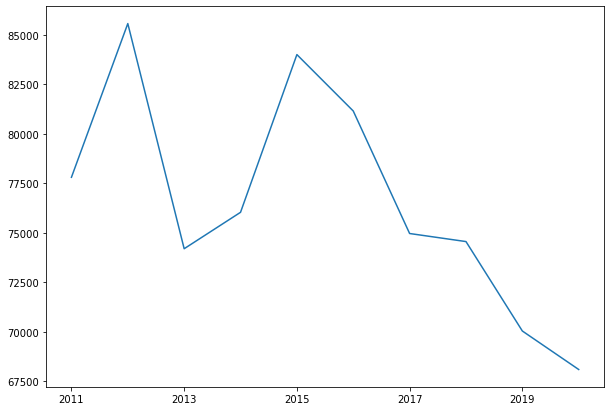

In [102]:
total_fans.iloc[0].plot(figsize=(10, 7))

Here we can see the decline in NBA total fans. which is actually at an all time low

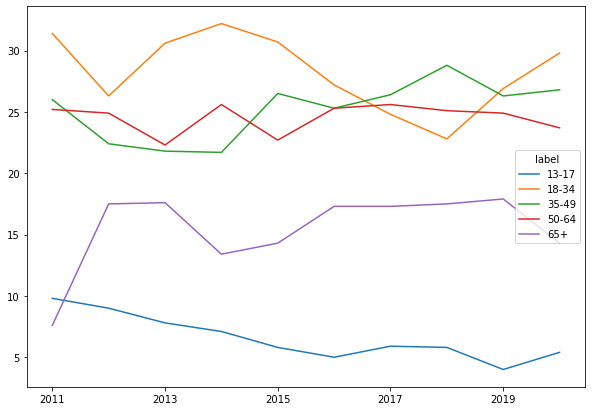

In [103]:
fan_demographics.iloc[0:5].T.plot(figsize=(10, 7))

This is the percentage of fans grouped by age over the past decade. recently there has been an upswing in fans in the 18-34 range I would like to investigate this trend further.

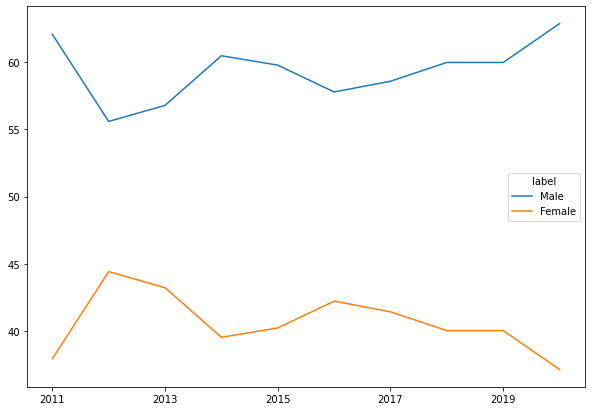

In [104]:
fan_demographics.iloc[11:13].T.plot(figsize=(10, 7))

In this graph you have the percentage of total fans based on gender. This method of data collection is outdated and does not take into account individuals who are non-binary in terms of gender. This could potentially be hiding further insights about a demographic that is becoming increasingly important.

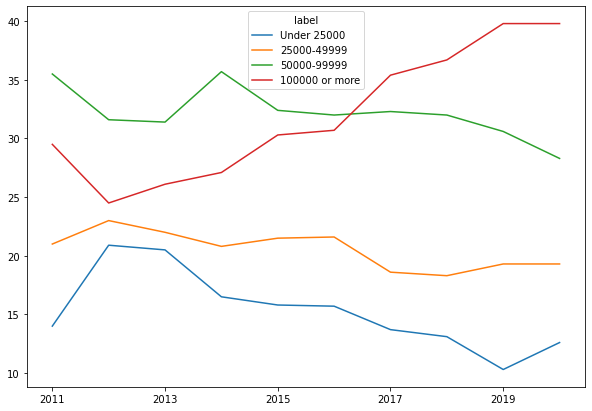

In [105]:
fan_demographics.iloc[14:18].T.plot(figsize=(10, 7))

This is the total fans grouped by income. The 100,000 and higher demographic has become more influential in the market. All the other demographics show a slight decline I am curious to know if this is due to people making higher salaries in general or if the was a shift in the demographic interested in sports.